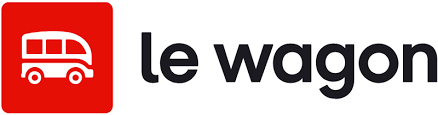


Vous travaillez dans l'équipe data de GreenThumb. Votre mission est d'explorer les données de l'entreprise et de développer un modèle de Deep Learning pour analyser les sentiments des reviews.

Consignes :
- Répondez aux questions : Remplissez les cellules de code ou de texte lorsque vous voyez *Répondez ici*.

- Focus sur les [reviews](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv) : Concentrez-vous sur l'analyse de sentiment des reviews.

- Utilisez le Deep Learning : Développez des modèles de Deep Learning.

- Priorité à l'apprentissage correct : Le temps est limité, l'objectif est d'avoir des modèles qui apprennent correctement, pas nécessairement les plus performants.

# Exploration de la donnée

Nous allons nous concentrer sur le **[reviews_df](https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv)**.

Exectuez la cellule ci-dessous pour récupérer la donnée.

In [1]:
import pandas as pd

reviews_df = pd.read_csv("https://wagon-public-datasets.s3.amazonaws.com/certification/da-ds-de/reviews.csv")

In [2]:
reviews_df.head()

,ReviewID,ReviewScore,ReviewText,OrderID
0,1,5,NaN,501210
1,1,4,NaN,669676
2,1,5,NaN,800210
3,1,5,NaN,228723
4,1,5,NaN,573604


In [3]:
reviews_df.shape

(485055, 4)

1 / Supprimez toutes les lignes avec des valeurs manquantes et toutes les lignes en double.

Check missing values

In [4]:
reviews_df.isnull().sum().sort_values(ascending=False)

ReviewText     475705
ReviewID            0
ReviewScore         0
OrderID             0
dtype: int64

In [5]:
reviews_df = reviews_df.dropna()
print(reviews_df.shape)
reviews_df.head()

(9350, 4)


,ReviewID,ReviewScore,ReviewText,OrderID
8,1,4,"Product came As expected, timely and well-pack...",814344
31,1,5,Indoor Sweet-scented Or Creating Perfect outdo...,501052
69,1,4,"Efficient delivery, item matches the online de...",824173
87,1,4,ITEM ARRIVED ON TIME AND AS DESCRIBED.,8078
140,1,4,"Satisfactory experience, would recommend to ot...",376448


Check duplicates

In [6]:
reviews_df.duplicated().sum()

104

In [7]:
reviews_df = reviews_df.drop_duplicates()
print(reviews_df.shape)
reviews_df.head()

(9246, 4)


,ReviewID,ReviewScore,ReviewText,OrderID
8,1,4,"Product came As expected, timely and well-pack...",814344
31,1,5,Indoor Sweet-scented Or Creating Perfect outdo...,501052
69,1,4,"Efficient delivery, item matches the online de...",824173
87,1,4,ITEM ARRIVED ON TIME AND AS DESCRIBED.,8078
140,1,4,"Satisfactory experience, would recommend to ot...",376448


2 / Utilisez la librairie de votre choix pour créer un graphique montrant la répartition des **ReviewScore**.

<AxesSubplot:title={'center':'ReviewScore repartition'}>

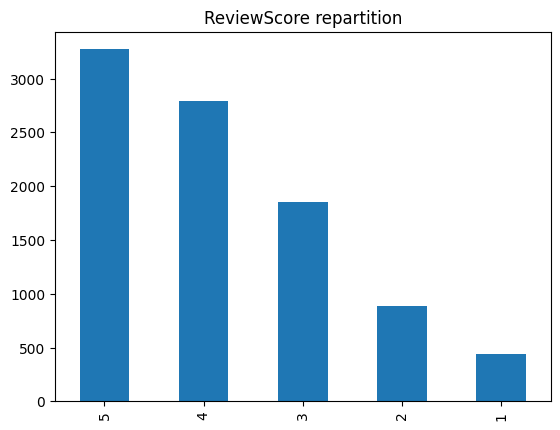

In [8]:
reviews_df['ReviewScore'].value_counts().plot(kind='bar', title='ReviewScore repartition')


# Préparation de la donnée

3 / Créez votre feature X comprenant la colonne **ReviewText** et votre y comprenant la colonne **ReviewScore**.

In [9]:
X = reviews_df[['ReviewText']]
print(X.shape)
X.head()

(9246, 1)


,ReviewText
8,"Product came As expected, timely and well-pack..."
31,Indoor Sweet-scented Or Creating Perfect outdo...
69,"Efficient delivery, item matches the online de..."
87,ITEM ARRIVED ON TIME AND AS DESCRIBED.
140,"Satisfactory experience, would recommend to ot..."


In [10]:
y = reviews_df['ReviewScore']
print(y.shape)
y.head()


(9246,)


8      4
31     5
69     4
87     4
140    4
Name: ReviewScore, dtype: int64

In [11]:
type(y)


pandas.core.series.Series

4 / Transformez la target en utilisant les correspondances suivantes :
- 1 => 0
- 2 => 0
- 3 => 0
- 4 => 1
- 5 => 1

In [12]:
def transform(s):
  if s in range(1,4):
    s = 0
  if s in range(4,6):
    s = 1
  return s

y  = y.apply(transform)
y.value_counts()/len(y)*100

1    65.585118
0    34.414882
Name: ReviewScore, dtype: float64

5 / Utilisez la méthode de hold-out pour ne garder que 20% de la donnée pour le test.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Shape of X_train : {X_train.shape}")
print(f"Shape of y_train : {y_train.shape}")

print(f"Shape of X_test : {X_test.shape}")
print(f"Shape of y_test : {y_test.shape}")


Shape of X_train : (7396, 1)
Shape of y_train : (7396,)
Shape of X_test : (1850, 1)
Shape of y_test : (1850,)


6 / Appliquez sur le X_train toutes les méthodes de transformations de la donnée que vous connaissez et qui vous paraissent pertinentes.

In [14]:
import string
from nltk.corpus import stopwords 
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # Removing whitespaces
    sentence = sentence.strip()
    
    # Lowercasing
    sentence = sentence.lower()
    
    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    
    # Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '')
        
    # Tokenizing
    tokenized = word_tokenize(sentence)
    
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    
    return cleaned_sentence

X_train['ReviewText_cleaned'] = X_train['ReviewText'].apply(preprocessing)

X_train.head()

,ReviewText,ReviewText_cleaned
432716,"Pleased With vera their Care. plants, Easy Ben...",pleased with vera their care plant easy benefi...
279725,Product Performs Well For its Intended use.,product performs well for it intended use
360369,Couldn't be happier with of or natural collect...,couldnt be happier with of or natural collecti...
333799,Expected a lot more from collection for screen...,expected a lot more from collection for screen...
34641,PLEASANTLY SURPRISED WITH THE QUALITY AT THIS ...,pleasantly surprised with the quality at this ...


7 / Appliquez sur le X_test les mêmes transformations en les ajustant si nécessaire.

In [15]:
X_test['ReviewText_cleaned'] = X_test['ReviewText'].apply(preprocessing)
X_test.head()

,ReviewText,ReviewText_cleaned
331459,item arrived on time and as described.,item arrived on time and a described
303752,"MEETS THE REQUIREMENTS, NO COMPLAINTS SO FAR.",meet the requirement no complaint so far
407891,"Amazing Product, Goes Above And beyond.",amazing product go above and beyond
241700,Customer service was helpful and responsive.,customer service wa helpful and responsive
208061,absolutely in love with outdoor for jasmine sw...,absolutely in love with outdoor for jasmine sw...


In [16]:
print(f"Type of X_test : {type(X_test)}")

Type of X_test : <class 'pandas.core.frame.DataFrame'>


# Baseline

8 / Vous voulez prédire la note à partir du commentaire.

- Quel type de tâche est-ce ?

- Quelle métrique est appropriée pour ce type de tâche et pourquoi ?

This is a classification task.
We could use accuracy as metric as we want the model to be predict correctly (positive and negative reviews). 


9 / Calculez un score de baseline.

In [17]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

# Pipeline vectorizer + Naive Bayes
pipeline_naive_bayes = make_pipeline(
    TfidfVectorizer(),
    MultinomialNB()
)

# Cross-validation
cv_results = cross_validate(pipeline_naive_bayes, 
                            X_train['ReviewText_cleaned'], 
                            y_train, 
                            cv = 10, 
                            scoring = ["accuracy"])

NB_metric = cv_results["test_accuracy"].mean()
# NB_metric = np.round(NB_metric,2)
print(f"average accuracy for Naive Bayes model : {NB_metric}")


average accuracy for Naive Bayes model : 0.7769048751051457


# Votre architecture de RNN

Executez le code ci-dessous pour tokenizer et padder la donnée.

In [18]:
from tensorflow.keras.preprocessing.text import Tokenizer

tk = Tokenizer()
tk.fit_on_texts(X_train['ReviewText_cleaned'])

X_train_tokens = tk.texts_to_sequences(X_train['ReviewText_cleaned'])
X_test_tokens = tk.texts_to_sequences(X_test['ReviewText_cleaned'])

# Vocab size?
vocab_size = len(tk.word_index)
vocab_size


344

In [19]:
print(len(X_train_tokens))
print(len(X_test_tokens))

7396
1850


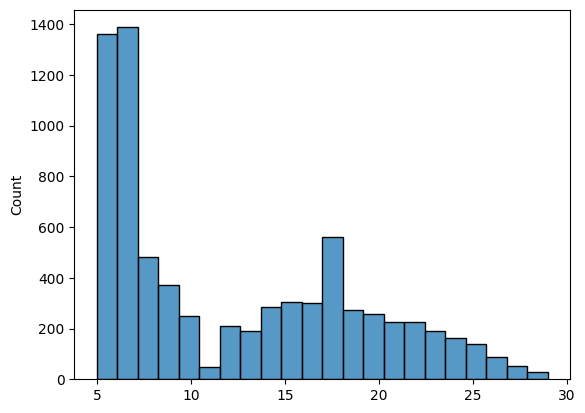

In [20]:
import seaborn as sns
sns.histplot([len(x) for x in X_train_tokens]);

In [21]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = 30
X_train_pad = pad_sequences(X_train_tokens, dtype=float, padding='post', maxlen= maxlen)
X_test_pad = pad_sequences(X_test_tokens, dtype=float, padding='post', maxlen= maxlen)

In [22]:
print(X_train_pad.shape)
print(X_test_pad.shape)

(7396, 30)
(1850, 30)


10 / Créez une architecture de RNN pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [23]:
import matplotlib.pyplot as plt


# VISUALIZATION
def plot_loss_accuracy(history, title=None):
    fig, ax = plt.subplots(1,2, figsize=(20,7))

    # --- LOSS --- 

    ax[0].plot(history.history['loss'])
    ax[0].plot(history.history['val_loss'])

    ax[0].set_title('Model loss')
    ax[0].set_ylabel('Loss')
    ax[0].set_xlabel('Epoch')

    ax[0].set_ylim((0,1))
    
    ax[0].legend(['Train', 'Test'], loc='best')

    ax[0].grid(axis="x",linewidth=0.5)
    ax[0].grid(axis="y",linewidth=0.5)

    # --- ACCURACY

    ax[1].plot(history.history['accuracy'])
    ax[1].plot(history.history['val_accuracy'])

    ax[1].set_title('Model Accuracy')
    ax[1].set_ylabel('Accuracy')
    ax[1].set_xlabel('Epoch')

    ax[1].legend(['Train', 'Test'], loc='best')

    ax[1].set_ylim((0.7,0.9))

    ax[1].grid(axis="x",linewidth=0.5)
    ax[1].grid(axis="y",linewidth=0.5)

    if title:
        fig.suptitle(title) 

In [24]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

embedding_size = 50

def initialize_model_RNN():
    model = Sequential()
    model.add(layers.Embedding( input_dim = vocab_size+1,
                                output_dim = embedding_size,
                                mask_zero=True,))
    model.add(layers.LSTM(units = 20, activation='tanh'))
    model.add(layers.Dense(15, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    # compile
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [25]:
%%time

model = initialize_model_RNN()

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(x=X_train_pad,
                    y=y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=0,
                    callbacks=[es],
                    validation_split=0.3)

2024-09-18 16:13:58.973623: E tensorflow/core/util/util.cc:131] oneDNN supports DT_BOOL only on platforms with AVX-512. Falling back to the default Eigen-based implementation if present.


CPU times: user 2min 29s, sys: 1min 16s, total: 3min 46s
Wall time: 59.3 s


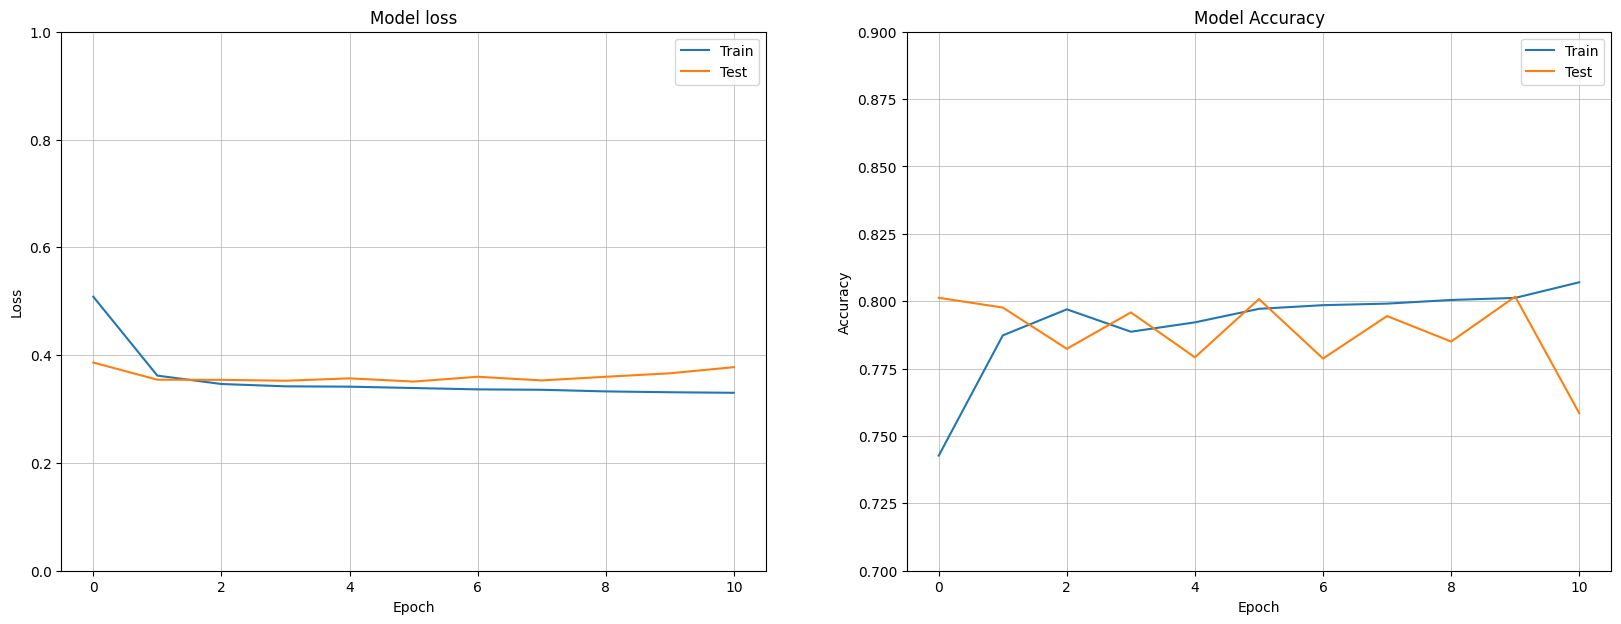

In [26]:
plot_loss_accuracy(history)

11 / Évaluez votre modèle de RNN sur les données de X_test et enregistrez la métrique dans RNN_metric.

In [27]:
res = model.evaluate(X_test_pad, y_test, verbose=0)
RNN_metric = res[1]
RNN_metric

0.7994594573974609

# Votre architecture de CNN

12 / Créez une architecture de CNN adaptée au texte pour accomplir cette tâche et entraînez le modèle. Veillez à prendre des mesures pour éviter l'overfitting.

In [28]:
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam

def initialize_model_CNN():
    model = Sequential()
    model.add(layers.Embedding( input_dim = vocab_size+1,
                                output_dim = embedding_size,
                                mask_zero=True,))
    
    model.add(layers.Conv1D(filters = 10,
                            kernel_size = 15,
                            padding='same',
                            activation='relu',))
    
    model.add(layers.Conv1D(filters = 10,
                        kernel_size = 10,
                        padding='same',
                        activation='relu',))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(units = 30, activation='relu'))
    model.add(layers.Dropout(rate = 0.15))
    model.add(layers.Dense(units = 1, activation='sigmoid'))
    
    # Compile
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model


In [29]:
%%time

model = initialize_model_CNN()

from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(patience = 5, restore_best_weights = True)

history = model.fit(x=X_train_pad,
                    y=y_train,
                    batch_size=32,
                    epochs=1000,
                    verbose=0,
                    callbacks=[es],
                    validation_split=0.3)

/home/thierry/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


CPU times: user 20.4 s, sys: 9.52 s, total: 29.9 s
Wall time: 12.2 s


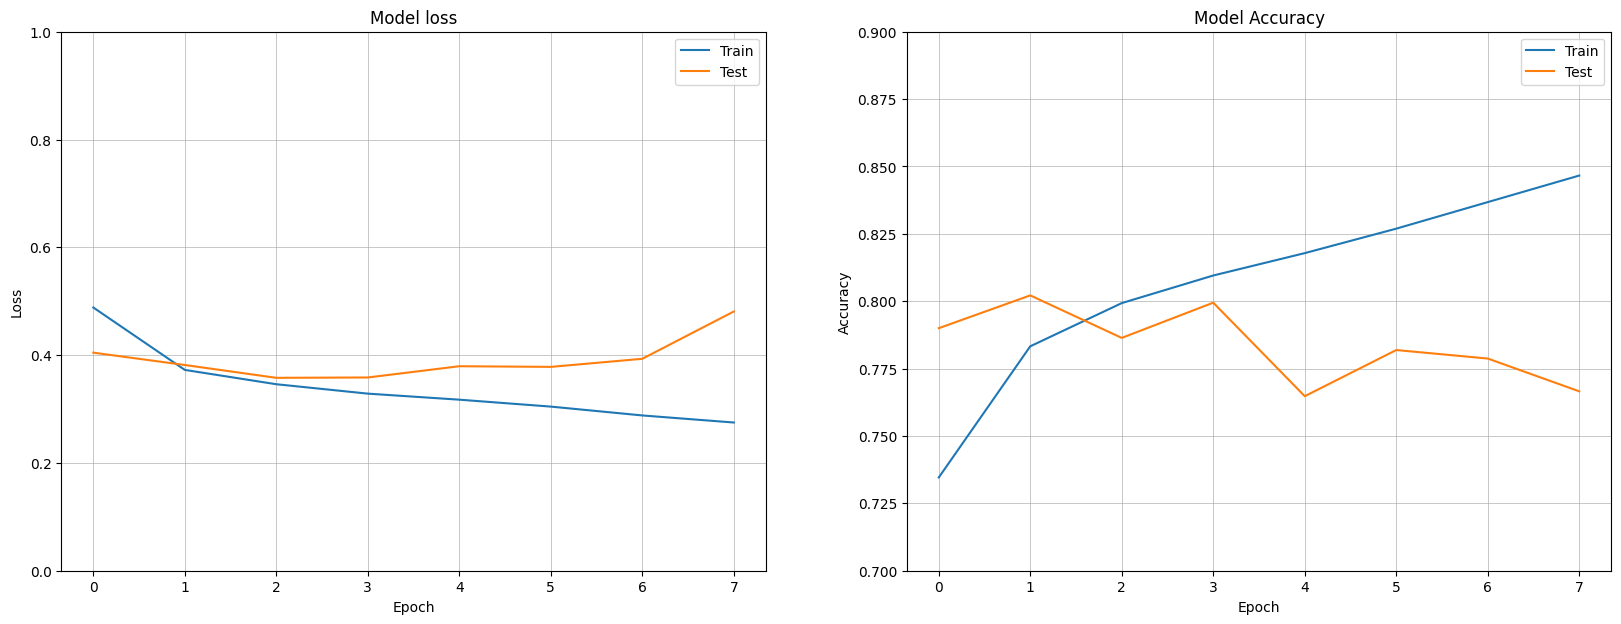

In [30]:
plot_loss_accuracy(history)

13 / Évaluez votre modèle de CNN sur les données de X_test et enregistrez la métrique dans CNN_metric.

In [31]:
res = model.evaluate(X_test_pad, y_test, verbose=0)
CNN_metric = res[1]
CNN_metric

0.7778378129005432

# Conclusion

14 / Avez-vous battu votre baseline avec au moins un des modèles ?

*Répondez ici. Si oui, avec quel(s) modèles(s)?*



Answer : Both RNN and CNN models beat the baseline model.


In [32]:
metrics = {'model' : ['NB (baseline)','RNN','CNN'],     
       'accuracy' : [NB_metric, RNN_metric, CNN_metric]}

metrics = pd.DataFrame(metrics).sort_values(by = 'accuracy', ascending=False)
metrics

,model,accuracy
1,RNN,0.799459
2,CNN,0.777838
0,NB (baseline),0.776905


# Save the trained models (Bonus Thierry)



In [33]:
import os
import time
from tensorflow.keras import models

timestamp = time.strftime("%Y%m%d_%H%M%S")

path = '../data/trained_models/'
model.save(path + 'CNN_model.keras')

# # and you can load it somewhere else:
loaded_model = models.load_model(path + 'CNN_model.keras')
loaded_model.layers


/home/thierry/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/keras/src/layers/layer.py:877: UserWarning: Layer 'conv1d' (of type Conv1D) was passed an input with a mask attached to it. However, this layer does not support masking and will therefore destroy the mask information. Downstream layers will not see the mask.
  warnings.warn(


[<Embedding name=embedding_1, built=True>,
 <Conv1D name=conv1d, built=True>,
 <Conv1D name=conv1d_1, built=True>,
 <Flatten name=flatten, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout, built=True>,
 <Dense name=dense_3, built=True>]

In [34]:
result = model.predict(X_test_pad)

58/58 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [35]:
num  = 200
print(X_test['ReviewText'].iloc[num])
print(result[num])

CAREFULLY TREES ART THE YOUR LIVING IS QUITE GOOD FOR THE PRICE. SATISFIED WITH WHAT I GOT.
[0.58110243]


In [36]:
import pickle

# Export Pipeline as pickle file
with open("tokenizer.pkl", "wb") as file:
    pickle.dump(tk, file)

# Load Pipeline from pickle file
my_tokenizer = pickle.load(open("tokenizer.pkl","rb"))

# API

15 / Vous souhaitez permettre à votre collègue aux États-Unis d'utiliser votre modèle pour faire des prédictions. Écrivez ci-dessous le script Python pour une API qui permettra d'effectuer des prédictions à l'aide de votre modèle.

N'oubliez pas de documenter votre code : étapes, types de données, méthodes, etc.

In [38]:

#-------------------------------------------------------------------------------
# Author : Thierry CAROLE
# Batch Le Wagon 1575 - Data Science
# Date : 19/09/2024
# Github link : xxx
# Code from api.py
#-------------------------------------------------------------------------------

#-------------------------------------------------------------------------------
# GLOBAL STRATEGY : After processing the input (raw reviews from json file),
# the API will return the corresponding predictions.
#-------------------------------------------------------------------------------

# Basic libraries
import pandas as pd
import numpy as np
import json

#Import FastApi python framework
from fastapi import FastAPI, UploadFile, File

# Import custom functions from .py files
from GreenThumbs_package_folder.api_functions.preprocessor_api import preprocess_features, get_tokenized,get_padded
from GreenThumbs_package_folder.api_functions.model_api import load_tokenizer,load_model,get_prediction

# Instantiate FastAPI
app = FastAPI()

# Define a root `/` endpoint
@app.get('/')
def index():
    return {'New project': 'This is the first app of my new project !'}

# GLOBAL STRATEGY : After processing the input (raw reviews from json file),
# the API will return the corresponding predictions.
# Define an endpoint allowing to upload a json file (i.e raw reviews).
@app.post("/upload_and_predict_sentiment")
def create_upload_files(upload_file: UploadFile = File(...)):
    # Retrieve input data from json file
    json_data = json.load(upload_file.file)

    # Create a Pandas dataframe from json input file
    # Type of X_test : <class 'pandas.core.frame.DataFrame'>
    X_test = pd.DataFrame(json_data)
    print(f"✅ Type of X_test : {type(X_test)}")

    # Preprocess data (i.e Removing whitespaces, Lowercasing,
    # Removing numbers, Removing punctuation, Lemmatizing)
    #Type of X_test_preproc : <class 'pandas.core.series.Series'>
    X_test_preproc = preprocess_features(X_test['ReviewText'])
    print(f"✅ Type of X_test_preproc : {type(X_test_preproc)}")

    # ---- Tokenize the preprocessed data----
    #First, we retrieve the tokenizer that has been fitting on the
    # training dataset previously (fitted tokenizer stored on the cloud for example).
    #Type of tokenizer : <class 'keras.src.legacy.preprocessing.text.Tokenizer'>
    tokenizer = load_tokenizer()
    print(f"✅ Type of tokenizer : {type(tokenizer)}")

    # Secondly, we tokenize the preprocessed data with the fitted tokenizer
    #Type of X_test_tokens : <class 'list'>
    X_test_tokens = get_tokenized(X_test_preproc, tokenizer)
    print(f"✅ Type of X_test_tokens : {type(X_test_tokens)}")

    # Padding the preprocessed and tokenized data
    #Type of X_test_pad : <class 'numpy.ndarray'>
    X_test_pad = get_padded(X_test_tokens, maxlen = 30)
    print(f"✅ Type of X_test_pad : {type(X_test_pad)}")

    #  Load RNN model that is already fitted on the training data.
    #(fitted RNN model stored on the cloud for example).
    #Type of model : <class 'keras.src.models.sequential.Sequential'>
    model = load_model('RNN')
    print(f"✅ Type of model : {type(model)}")

    # Prediction
	# For information, the get_prediction function is described below
    #Type of prediction : <class 'numpy.ndarray'>
    prediction = get_prediction(X_test_pad, model)
    print(f"✅ Type of prediction : {type(prediction)}")
    prediction = prediction.tolist()

    #Type of prediction_final : <class 'list'>
    prediction_final = [np.round(pred[0],4) for pred in prediction]
    print(f"✅ Type of prediction_final : {type(prediction_final)}")
    print(prediction_final)
    # Return the prediction to the user
    return {'Prediction' : prediction_final}



#-------------------------------------------------------------------------------
#  Code from : model_api.py
#-------------------------------------------------------------------------------


#  ---------------- MODEL PREDICTION (RNN, CNN) ----------------------
def get_prediction(X_test, model):
    """ Gets prediction from X_test (numpy array)
    and model (keras sequential model)
    and returns a array of predictions"""
    prediction = model.predict(X_test)
    return prediction
# --------------------------------------------------------------------


ModuleNotFoundError: No module named 'GreenThumbs_package_folder'

16 / Quelles sont les différentes étapes et commandes à effectuer dans le terminal pour déployer un modèle ?

In [ ]:
# We will use Docker and Google Artifact Registry (i.e GAR) to deploy the model.

# 1. We'll build the API image locally. We'll run it.

=> docker build --tag=$GAR_IMAGE:dev .
=> docker run -e PORT=8000 -p 8000:8000 --env-file .env $GAR_IMAGE:dev

# 2. If local API image is running without issue, we'll build the final image to push to Google Artifact Registry. We'll run it to check everything is ok locally (no issue).

=> docker build -t  $GCP_REGION-docker.pkg.dev/$GCP_PROJECT/hr-data-repo/$GAR_IMAGE:prod .
=> docker run -e PORT=8000 -p 8000:8000 --env-file .env $GCP_REGION-docker.pkg.dev/$GCP_PROJECT/data-repo/$GAR_IMAGE:prod

# 3. We'll push the dedicated image to Google Artifact registry.
=> docker push $GCP_REGION-docker.pkg.dev/$GCP_PROJECT/data-repo/$GAR_IMAGE:prod

# 4. We'll deploy the API from GAR (Google Artifact Registry).

=> gcloud run deploy --image $GCP_REGION-docker.pkg.dev/$GCP_PROJECT/data-repo/$GAR_IMAGE:prod --memory $GAR_MEMORY --region $GCP_REGION --env-vars-file .env.yaml

# 5. Finally, we retrieve the service URL to share it with US colleagues.

17 / Quels sont les différents éléments sur lesquels vous pouvez évaluer et optimiser la performance de votre API ?

*Répondez ici*

18 / Parmi les options suivantes, laquelle n'est pas un enjeu pour le bon déploiement d'un modèle ?

Options :

- L'éthique
- La confidentialité
- La taille du modèle
- La sécurité

*Répondez ici*

19 / Quelles mesures pouvez-vous mettre en place pour répondre efficacement à ces enjeux lors du déploiement d'un modèle ?

*Répondez ici*

